# Model Building: Training, Predicting and Testing

In [2]:
import pandas as pd
import numpy as np

In [3]:
bank = pd.read_csv('bank-numerical.csv', sep=',')

In [4]:
bank.drop(columns='Unnamed: 0', axis=1, inplace=True)

In [5]:
bank.head()

,age,balance,day,duration,campaign,pdays,previous,Target,default_n,job_blue-collar,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


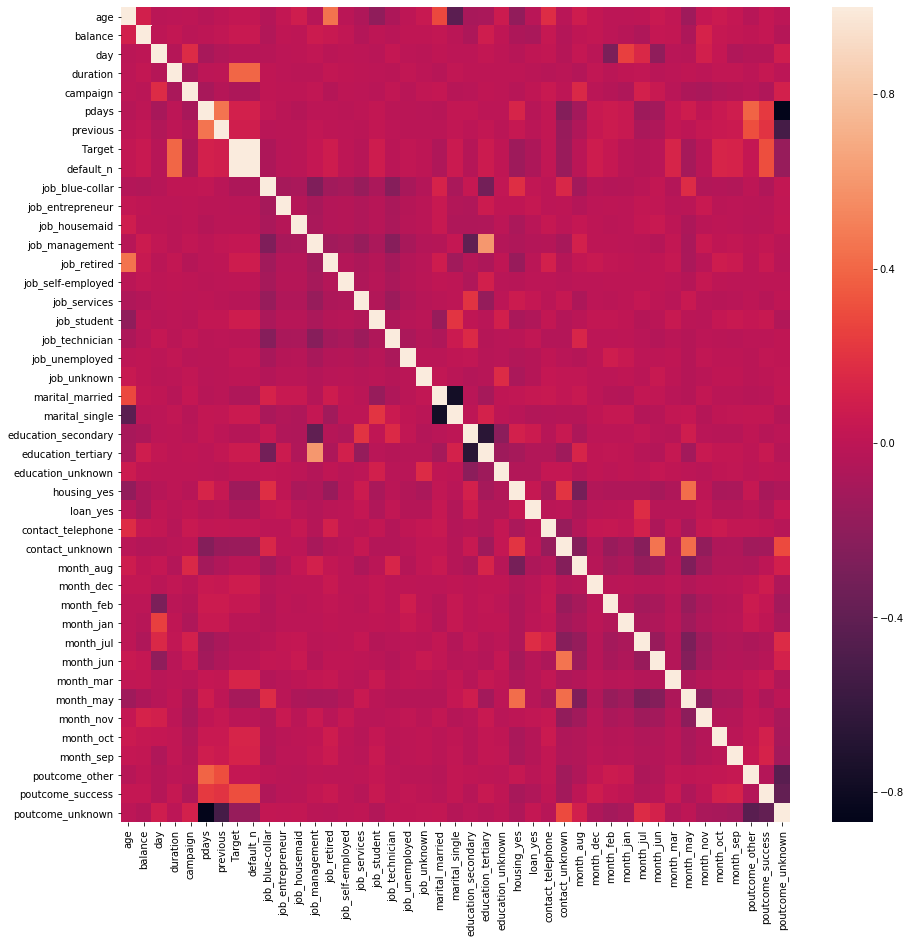

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
%config InlineBackend.figure_format = 'png'
corr_matrix = bank._get_numeric_data().corr()
sns.heatmap(corr_matrix)

# Splitting data set

In [6]:
# When splitting the data set the first iteration, train/test was 80/20


X = bank.drop(columns=['Target','day','default_n'], axis=1)

# default_n column was drop as it was colinear with the Target column.

y = bank['Target']

In [71]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Logistic Regression

In [72]:
from sklearn.linear_model import LogisticRegression

#Creating the Logistic Regression model and predictions

log_reg = LogisticRegression().fit(X_train, y_train)
y_pred = log_reg.predict(X_test)


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [73]:
from sklearn import metrics

# Creating confusion matrix

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)
print(cnf_matrix)

7817 182 678 366
[[7817  182]
 [ 678  366]]


In [74]:
# High accuracy doesn't mean musch in this case as we are mainly intrested in predicting True Positives.
# The high accuracy depends on the imbalance of yes/no in the Target variable in the data set. 
# Therefore, I want to increase Precision as much as possible. 
# Although, not on the expense of Recall.

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9048988167643481
Precision: 0.6678832116788321
Recall: 0.3505747126436782


In [75]:
# I will use the F1 (a weigthed average of Precision and Recall) as evaluation metrics for this project,
# alongside with Precision and Recall.

from sklearn.metrics import f1_score


print(f1_score(y_test, y_pred))

0.4597989949748744


# Decision Tree

In [76]:
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier



In [77]:
# decision tree

dt = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0).fit(X_train, y_train)
y_pred = dt.predict(X_test)


In [78]:
# Creating confusion matrix

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 score: ",f1_score(y_test, y_pred))

7910 89 887 157
[[7910   89]
 [ 887  157]]
Accuracy: 0.8920712153046555
Precision: 0.6382113821138211
Recall: 0.1503831417624521
F1 score:  0.24341085271317828


In [ ]:
# Results are not satisfactory enough to keep on trying to modify this algorithm.

# Random Forest

In [79]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
rf = RandomForestClassifier().fit(X_train, y_train)
y_pred = rf.predict(X_test)

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [81]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 score: ",f1_score(y_test, y_pred))

7806 193 702 342
[[7806  193]
 [ 702  342]]
Accuracy: 0.9010284197721995
Precision: 0.6392523364485981
Recall: 0.3275862068965517
F1 score:  0.4331855604813173


In [ ]:
# Results from the logistic regression:

"""
7817 182 678 366
[[7817  182]
 [ 678  366]]

Accuracy: 0.9048988167643481
Precision: 0.6678832116788321
Recall: 0.3505747126436782
F1 score: 0.4597989949748744
"""

# We see that Random Forest predicts slightly worse than the Logistic regression. I will continue modify 
# Random Forest algorithm alongside with the Logistic Regression


# KNN

In [82]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
y_pred = knn_model.predict(X_test)


cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_lr).ravel()
print(tn, fp, fn, tp)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 score: ",f1_score(y_test, y_pred))

6110 1889 786 258
[[7619  380]
 [ 730  314]]
Accuracy: 0.8772531239632865
Precision: 0.45244956772334294
Recall: 0.3007662835249042
F1 score:  0.36133486766398154


In [ ]:
# Results are not satisfactory enough to keep on trying to modify this algorithm.

# Support Vector Machine (SVM)

In [58]:
from sklearn.svm import SVC 
# using a gaussian kernel

svc_classifier = SVC(kernel = 'rbf').fit(X_train, y_train)
y_pred_svc = svc_classifier.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 score: ",f1_score(y_test, y_pred))

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


7549 417 753 324
[[7549  417]
 [ 753  324]]
Accuracy: 0.8706181576910318
Precision: 0.43724696356275305
Recall: 0.3008356545961003
F1 score:  0.3564356435643564


In [ ]:
# Results are not satisfactory enough to keep on trying to modify this algorithm.

# Logistic Regression using Recursive Feature Elimination

In [44]:
from sklearn.feature_selection import RFE

In [89]:
# Attempting to increase predictability using RFE.

# Removing features of low importance could improve predictions, 
# as some features may not contribute to the prediction variable

# RFE could also contribute reduce model complexity.

log_reg = LogisticRegression()
rfe=RFE(log_reg,30)
rfe=rfe.fit(X_train,y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  

In [90]:
rfe.support_

array([False, False, False,  True, False, False,  True,  True,  True,
       False,  True, False,  True,  True, False,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False])

In [91]:
rfe.ranking_

array([ 9, 11,  7,  1, 10,  6,  1,  1,  1,  5,  1,  3,  1,  1,  4,  1,  2,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  8])

In [92]:
bank_rfe = bank[X.columns[rfe.support_]].head()

In [93]:
# Here are the columns that was genereated from the RFE.

bank_rfe.columns

Index(['campaign', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_retired', 'job_services', 'job_student', 'job_unemployed',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'housing_yes', 'loan_yes',
       'contact_telephone', 'contact_unknown', 'month_aug', 'month_dec',
       'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_other',
       'poutcome_success'],
      dtype='object')

In [94]:
# Creating Predictions

y_pred_rfe = rfe.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rfe))
print("Precision:",metrics.precision_score(y_test, y_pred_rfe))
print("Recall:",metrics.recall_score(y_test, y_pred_rfe))
print("f1:",f1_score(y_test, y_pred_rfe))
confusion_matrix(y_test, y_pred_rfe)


tn, fp, fn, tp = confusion_matrix(y_test, y_pred_rfe).ravel()
print(tn, fp, fn, tp)

Accuracy: 0.8938405396439235
Precision: 0.6532846715328468
Recall: 0.171455938697318
f1: 0.27162367223065254
7904 95 865 179


In [ ]:
# Below are the evaluation metrics for the first logistic regression

# Results from the logistic regression:

"""
7817 182 678 366
[[7817  182]
 [ 678  366]]

Accuracy: 0.9048988167643481
Precision: 0.6678832116788321
Recall: 0.3505747126436782
F1 score: 0.4597989949748744
"""
# As we can see the results are more or less identical on all metrics except recall and F1, which has gone down
# a lot. This makes predictions terrible overall.

# I believe that these results might have to with information loss. In order to improve predictions,
# I will continue using all features and rather try to modify the Machine Learning algorithms.

# Standardizing the Data

In [95]:
from sklearn.preprocessing import StandardScaler

In [96]:
# I standardize the data to make the continous variables in data set so that 
# these variables give equal contribution to the analysis

std = StandardScaler()
std.fit(X)

X_train = std.transform(X_train)
X_test = std.transform(X_test)





# Logistic Regression 2

In [ ]:
# class_weight="balanced", was added to handle the problem of imbalanced data in Target variable.

# This yielded the highest F1 score of all the models tested in this project.
# I would say that this model is the best one although the precision was drastically lowered
# High Recall means that we are better at predicting more relevant observation, although this happens at the
# expense of selecting more irrelevant observations as well.

# In the context of marketing this model would probably be the best as the goal is to reach as many  
# customers as possible that are willing to say yes to marketing campaign. On the other hand this would mean that
# the marketing campaign would be more expensive.

In [106]:
log_reg = LogisticRegression(n_jobs=1, verbose=10, class_weight="balanced")
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

print(tn, fp, fn, tp)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_lr))
print("Precision:",metrics.precision_score(y_test, y_pred_lr))
print("Recall:",metrics.recall_score(y_test, y_pred_lr))
print("F1 score: ",f1_score(y_test, y_pred_lr))

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[LibLinear]7619 380 730 314
Accuracy: 0.8465111135685061
Precision: 0.41762452107279696
Recall: 0.8352490421455939
F1 score:  0.5568326947637293


In [ ]:
# Results from first Log Reg:
"""
7817 182 678 366
Accuracy: 0.9048988167643481
Precision: 0.6678832116788321
Recall: 0.3505747126436782
F1 score: 0.4597989949748744
"""


# Random Forest 2

In [101]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_rf).ravel()


print(tn, fp, fn, tp)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))
print("Precision:",metrics.precision_score(y_test, y_pred_rf))
print("Recall:",metrics.recall_score(y_test, y_pred_rf))
print("F1 score:",f1_score(y_test, y_pred_rf))

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


7790 209 704 340
Accuracy: 0.899037929890523
Precision: 0.6193078324225865
Recall: 0.32567049808429116
F1 score: 0.42686754551161327


In [ ]:
# Evaluation metrics of Logistic Regression 2
"""
7619 380 730 314
Accuracy: 0.8465111135685061
Precision: 0.41762452107279696
Recall: 0.8352490421455939
F1 score:  0.5568326947637293"""

"""
7806 193 702 342
[[7806  193]
 [ 702  342]]
Accuracy: 0.9010284197721995
Precision: 0.6392523364485981
Recall: 0.3275862068965517
F1 score:  0.4331855604813173
"""


# Random Forest 3

In [102]:
rf = RandomForestClassifier(verbose=1,
                            n_jobs=-1,
                            n_estimators=75,
                            )
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_rf).ravel()


print(tn, fp, fn, tp)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))
print("Precision:",metrics.precision_score(y_test, y_pred_rf))
print("Recall:",metrics.recall_score(y_test, y_pred_rf))
print("f1:",f1_score(y_test, y_pred_rf))





[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    1.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  75 out of  75 | elapsed:    0.0s finished


7772 227 638 406
Accuracy: 0.9043459029083268
Precision: 0.641390205371248
Recall: 0.3888888888888889
f1: 0.4841979725700656


In [ ]:
# Random Forest 2:
"""
7790 209 704 340
Accuracy: 0.899037929890523
Precision: 0.6193078324225865
Recall: 0.32567049808429116
F1 score: 0.42686754551161327"""

# Log Reg 2

"""
7619 380 730 314
Accuracy: 0.8465111135685061
Precision: 0.41762452107279696
Recall: 0.8352490421455939
F1 score:  0.5568326947637293"""


# In the case of a low budget marketing campaign I would recommend this model as the precision is the highest.

In [105]:
import xgboost as xgb


dtrain = xgb.DMatrix(X_train, label=y_train)
param = {'objective': 'binary:logistic'}
param['nthread'] = 4
bst = xgb.train(param, dtrain)


y_pred_xgb = bst.predict(xgb.DMatrix(X_test))
y_pred_xgb[y_pred_xgb > 0.5] = 1
y_pred_xgb[y_pred_xgb <= 0.5] = 0

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_xgb).ravel()
print(tn, fp, fn, tp)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_xgb))
print("Precision:",metrics.precision_score(y_test, y_pred_xgb))
print("Recall:",metrics.recall_score(y_test, y_pred_xgb))
print("F1 score:",f1_score(y_test, y_pred_xgb))





7780 219 653 391
Accuracy: 0.9035718235098972
Precision: 0.6409836065573771
Recall: 0.37452107279693486
F1 score: 0.47279322853688033


# Logistic Regression 3 - stratified selection

In [12]:
X = bank.drop(columns=['Target','day','default_n'], axis=1)
y = bank['Target']

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [19]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std.fit(X)

X_train = std.transform(X_train)
X_test = std.transform(X_test)

In [31]:
from sklearn.linear_model import LogisticRegression

#Creating the Logistic Regression model and predictions

log_reg = LogisticRegression(n_jobs=1, verbose=3, solver='lbfgs').fit(X_train, y_train)
y_pred = log_reg.predict(X_test)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


In [32]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, f1_score


cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

print(tn, fp, fn, tp)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 score: ",f1_score(y_test, y_pred))

7782 203 688 370
Accuracy: 0.9014707508570164
Precision: 0.6457242582897034
Recall: 0.3497164461247637
F1 score:  0.4537093807480074


In [ ]:
# Log reg 1

"""
7817 182 678 366
Accuracy: 0.9048988167643481
Precision: 0.6678832116788321
Recall: 0.3505747126436782
F1 score: 0.4597989949748744
"""

# Making Improvements

In [40]:
bank1 = pd.read_csv('bank-full.csv', sep=';')

In [41]:
bank1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [42]:
yesno={'yes':1,'no':0}
bank1['Target'] = bank1.y.map(yesno)
bank1['default_n'] = bank1.default.map(yesno)

In [43]:
bank1.education.value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [44]:
edu = {'unknown':0,'primary':1,'secondary':2,'tertiary':3}
bank1['education_n'] = bank1.education.map(edu)

In [45]:
# Creating an artificial year
bank1['year']=2019

In [46]:
# Concatenating day+month+year to turn in to datetime format.
bank1.date=pd.to_datetime(bank1.day.astype(str)+'-'+bank1.month+'-'+bank1.year.astype(str))
bank1.weekday=bank1.date.dt.weekday_name

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


In [47]:
# Turning weekdays into numerical.
# Since is not an included feature in the dataset, I will only be able to tell if there are
# certain days that yield more sales/ yes- saying to the campaign.
# This is why I don't want to keep the names of the day in a string.

weekday = {'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}
bank1['Weekday_'] = bank1.weekday.map(weekday)

In [48]:
age_labels = [1,2,3,4,5]
# Bins with equal width
bank1['age_bin'] = pd.cut(bank1['age'],5, labels=age_labels)
# Bins with equal frequency
bank1['balance_bin'] = pd.qcut(bank1['balance'],5, labels=age_labels)

In [49]:
bank1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,previous,poutcome,y,Target,default_n,education_n,year,Weekday_,age_bin,balance_bin
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,unknown,no,0,0,3,2019,7,3,5
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0,unknown,no,0,0,2,2019,7,2,2
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,0,unknown,no,0,0,2,2019,7,1,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0,unknown,no,0,0,0,2019,7,2,4
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0,unknown,no,0,0,0,2019,7,1,1


In [50]:
bank2 = bank1.copy()

In [51]:
# Dropping string-columns that has already been turned into numerical
bank1.drop(columns=['education','default','y','year','balance','age'], axis=1, inplace=True)

In [52]:
bank1 = pd.get_dummies(data=bank1, columns=['job','marital',
                                'housing','loan','contact','month','poutcome'], drop_first=True)

In [53]:
bank1.shape

(45211, 42)

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score


# Splitting dataset
X = bank1.drop(columns=['Target'], axis=1)
y = bank1['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


# Standardizing data
std = StandardScaler()
std.fit(X)

X_train = std.transform(X_train)
X_test = std.transform(X_test)



#Creating the Logistic Regression model and predictions
log_reg = LogisticRegression(n_jobs=10, verbose=2, class_weight="balanced").fit(X_train, y_train)
y_pred = log_reg.predict(X_test)



# Printing evaluation metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 score: ",f1_score(y_test, y_pred))

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 10.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[LibLinear]6790 1166 209 878
[[6790 1166]
 [ 209  878]]
Accuracy: 0.8479486895941613
Precision: 0.4295499021526419
Recall: 0.8077276908923643
F1 score:  0.5608431810923028


In [61]:
?? RandomForestClassifier

Object ` RandomForestClassifier` not found.


In [63]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred_rf)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_rf).ravel()
print(tn, fp, fn, tp)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))
print("Precision:",metrics.precision_score(y_test, y_pred_rf))
print("Recall:",metrics.recall_score(y_test, y_pred_rf))
print("F1 score: ",f1_score(y_test, y_pred_rf))

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


7738 218 686 401
[[7738  218]
 [ 686  401]]
Accuracy: 0.9000331748313612
Precision: 0.6478190630048465
Recall: 0.3689052437902484
F1 score:  0.47010550996483
